In [1]:
import numpy as np
import pandas as pd
import seaborn as sna
import matplotlib as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = {
    "Energy Source": ["Solar" , "Wind" , "Hydropower" , "Geothermal" , "Biomass" , "Nuclear"],
    "Energy Consumption":[1200 , np.nan , 2900 , np.nan , 2500 , 3200],
    "Cost Millions ":[200 , 400 , np.nan , 150 , 250 , np.nan]
}

data

{'Energy Source': ['Solar',
  'Wind',
  'Hydropower',
  'Geothermal',
  'Biomass',
  'Nuclear'],
 'Energy Consumption': [1200, nan, 2900, nan, 2500, 3200],
 'Cost Millions ': [200, 400, nan, 150, 250, nan]}

In [3]:
energy_df = pd.DataFrame(data)

energy_df


,Energy Source,Energy Consumption,Cost Millions
0,Solar,1200.0,200.0
1,Wind,NaN,400.0
2,Hydropower,2900.0,NaN
3,Geothermal,NaN,150.0
4,Biomass,2500.0,250.0
5,Nuclear,3200.0,NaN


In [4]:
energy_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Energy Source       6 non-null      object 
 1   Energy Consumption  4 non-null      float64
 2   Cost Millions       4 non-null      float64
dtypes: float64(2), object(1)
memory usage: 276.0+ bytes


In [5]:
energy_df.isna


<bound method DataFrame.isna of   Energy Source  Energy Consumption  Cost Millions 
0         Solar              1200.0           200.0
1          Wind                 NaN           400.0
2    Hydropower              2900.0             NaN
3    Geothermal                 NaN           150.0
4       Biomass              2500.0           250.0
5       Nuclear              3200.0             NaN>

In [6]:
energy_df.isnull


<bound method DataFrame.isnull of   Energy Source  Energy Consumption  Cost Millions 
0         Solar              1200.0           200.0
1          Wind                 NaN           400.0
2    Hydropower              2900.0             NaN
3    Geothermal                 NaN           150.0
4       Biomass              2500.0           250.0
5       Nuclear              3200.0             NaN>

In [7]:
energy_df.describe()

,Energy Consumption,Cost Millions
count,4.000000,4.000000
mean,2450.000000,250.000000
std,881.286938,108.012345
min,1200.000000,150.000000
25%,2175.000000,187.500000
50%,2700.000000,225.000000
75%,2975.000000,287.500000
max,3200.000000,400.000000


<Axes: >

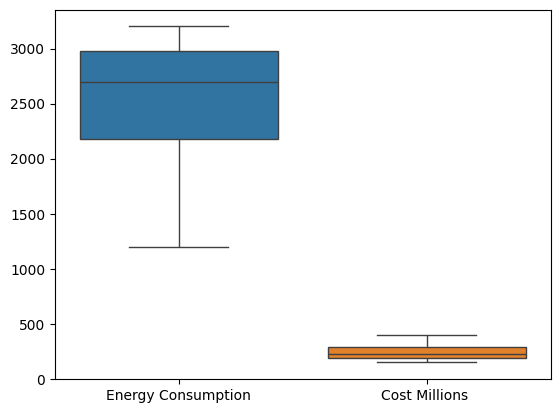

In [8]:
sna.boxplot(energy_df)


In [9]:
energy_df.columns


Index(['Energy Source', 'Energy Consumption', 'Cost Millions '], dtype='object')

In [10]:
energy_df["Energy Consumption"].fillna(energy_df["Energy Consumption"].mean(), inplace = True )


In [11]:
energy_df["Cost Millions "].fillna(energy_df["Cost Millions "].mean(), inplace = True )


In [12]:
energy_df

,Energy Source,Energy Consumption,Cost Millions
0,Solar,1200.0,200.0
1,Wind,2450.0,400.0
2,Hydropower,2900.0,250.0
3,Geothermal,2450.0,150.0
4,Biomass,2500.0,250.0
5,Nuclear,3200.0,250.0


In [13]:
energy_df.isna().sum()


Energy Source         0
Energy Consumption    0
Cost Millions         0
dtype: int64

In [14]:
energy_df.dtypes


Energy Source          object
Energy Consumption    float64
Cost Millions         float64
dtype: object

In [15]:
energy_df.columns


Index(['Energy Source', 'Energy Consumption', 'Cost Millions '], dtype='object')

In [16]:
scaler = MinMaxScaler()


In [17]:
energy_df[["Energy Consumption", "Cost Millions "]] = scaler.fit_transform(energy_df[["Energy Consumption", "Cost Millions " ]])


In [18]:
energy_df


,Energy Source,Energy Consumption,Cost Millions
0,Solar,0.000,0.2
1,Wind,0.625,1.0
2,Hydropower,0.850,0.4
3,Geothermal,0.625,0.0
4,Biomass,0.650,0.4
5,Nuclear,1.000,0.4


In [20]:
df = pd.get_dummies(energy_df , columns = ["Energy Source"] , dtype = "int")
df

,Energy Consumption,Cost Millions,Energy Source_Biomass,Energy Source_Geothermal,Energy Source_Hydropower,Energy Source_Nuclear,Energy Source_Solar,Energy Source_Wind
0,0.000,0.2,0,0,0,0,1,0
1,0.625,1.0,0,0,0,0,0,1
2,0.850,0.4,0,0,1,0,0,0
3,0.625,0.0,0,1,0,0,0,0
4,0.650,0.4,1,0,0,0,0,0
5,1.000,0.4,0,0,0,1,0,0


In [21]:
import matplotlib.pyplot as plt


In [22]:
months = ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sept' , 'Oct' , 'Nov' , 'Dec']
energy_consumption = [1200 , 1300 , 1100 , 1500 , 1400 , 1600 , 1900 , 1250 , 1450 , 1150 , 1650 , 1700]

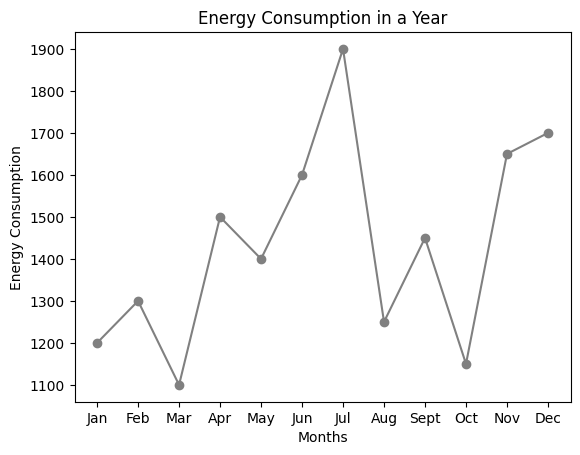

In [23]:
plt.plot(months , energy_consumption , marker = 'o' , color = 'grey' , linestyle = '-')
plt.title("Energy Consumption in a Year")
plt.xlabel('Months')
plt.ylabel('Energy Consumption')
plt.show()

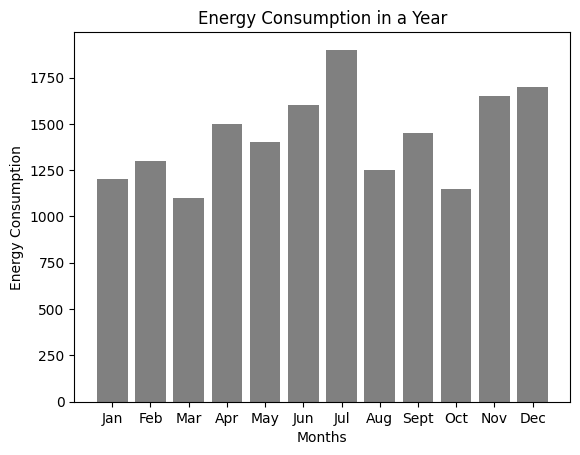

In [24]:
plt.bar(months , energy_consumption , color = 'grey')
plt.title("Energy Consumption in a Year")
plt.xlabel('Months')
plt.ylabel('Energy Consumption')
plt.show()

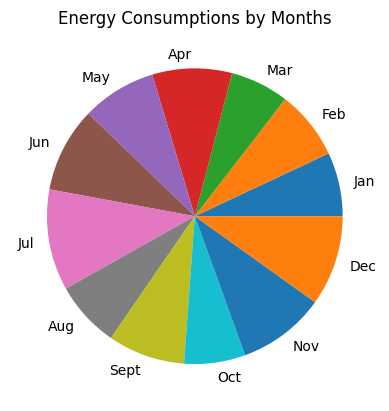

In [25]:
plt.pie(energy_consumption , labels = months)
plt.title("Energy Consumptions by Months")
plt.show()

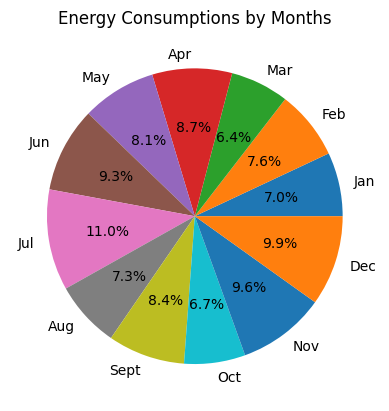

In [26]:
plt.pie(energy_consumption , autopct = "%1.1f%%" , labels = months)
plt.title("Energy Consumptions by Months")
plt.show()

In [27]:
data = {
    "Solar" : [1200 , 1500 , 1300],
    "Wind" : [3400 , 3600 , 3200],
    "Hydropower" : [2900 , 3100 , 2800],
    "Biomass" : [2500 , 2700 , 2400]
}
data


{'Solar': [1200, 1500, 1300],
 'Wind': [3400, 3600, 3200],
 'Hydropower': [2900, 3100, 2800],
 'Biomass': [2500, 2700, 2400]}

In [28]:
df = pd.DataFrame(data)
df

,Solar,Wind,Hydropower,Biomass
0,1200,3400,2900,2500
1,1500,3600,3100,2700
2,1300,3200,2800,2400


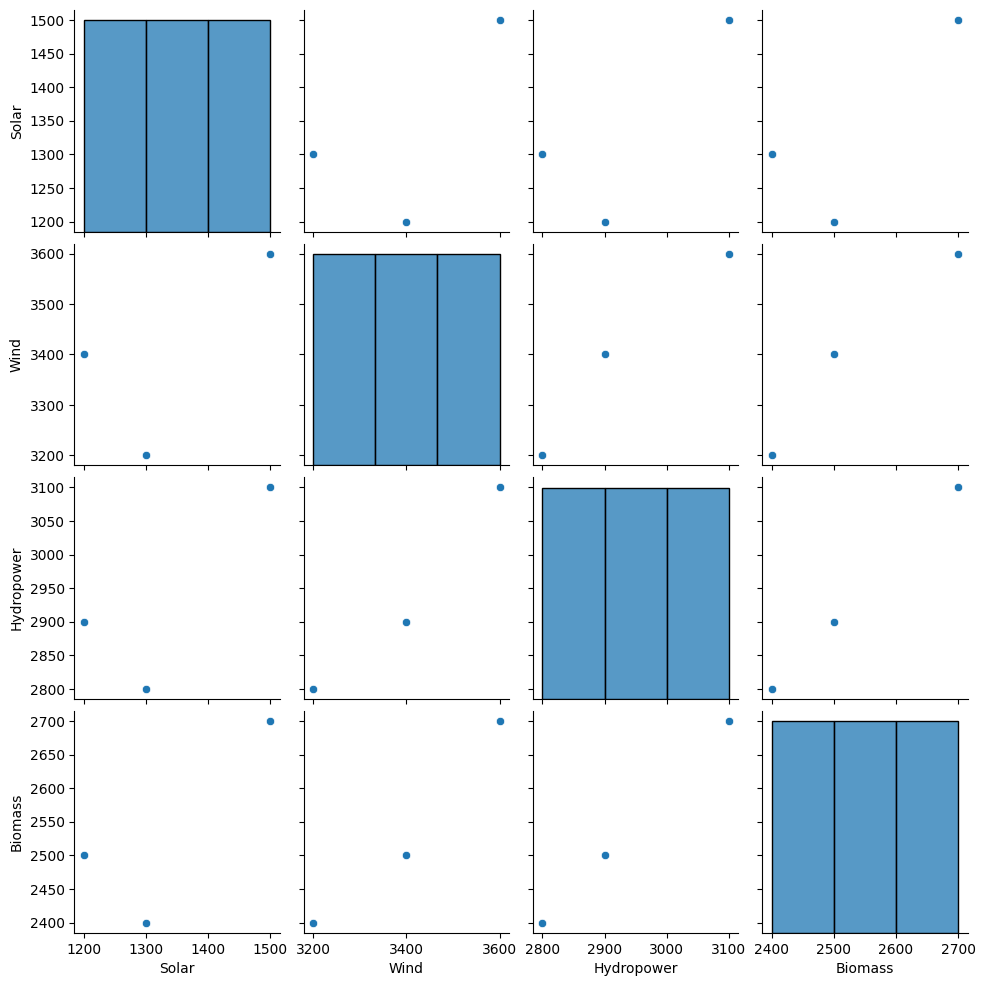

In [29]:
sna.pairplot(df)
plt.show()


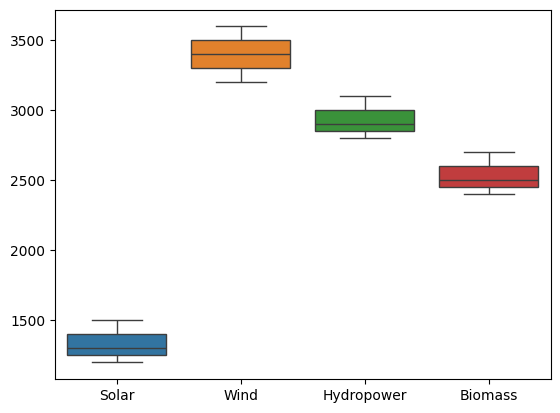

In [30]:
sna.boxplot(df)
plt.show()


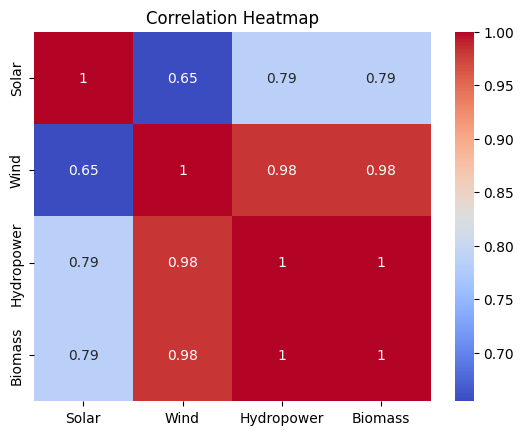

In [31]:
sna.heatmap(df.corr() , annot = True , cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()